### Описание проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### План проекта:
#### Шаг 1. Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. 
#### Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


#### Шаг 3. Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясним:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишим проблемы, которые  обнаружим. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишим возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрим данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумаем, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишем выводы
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime, timedelta
import random

In [5]:
def review(file):
    print('\n','Основная информация:','\n')
    display(file.info())
    print('\n','Описательная статистика:')
    display(file.describe().T)
    print(
        '\n','Количество явных дубликатов:',
        file.duplicated().sum()
    )
    print(
        '\n','Количество пропусков:','\n',
        file.isna().sum()
    )
    print('\n','Первые пять строк датасета:')
    display(file.head()) 

In [9]:
visits = pd.read_csv(
    r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Анализ бизнес-показателей\visits_info_short.csv'
    ,parse_dates = ['Session Start','Session End']
)
orders = pd.read_csv(
    r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Анализ бизнес-показателей\orders_info_short.csv'
    ,parse_dates = ['Event Dt']
)
costs = pd.read_csv(
    r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Анализ бизнес-показателей\costs_info_short.csv'
    ,parse_dates = ['dt']
)

### Обзор данных

#### Файл visits

In [4]:
review(visits)


 Основная информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None


 Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
User Id,309901.0,4.997664e+11,2.887899e+11,599326.0,2.493691e+11,4.989906e+11,7.495211e+11,9.999996e+11



 Количество явных дубликатов: 0

 Количество пропусков: 
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

 Первые пять строк датасета:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
for column in ['Region','Device','Channel']:
    print(f'Уникальные значения в столбце {column}:',2*'\n',visits[column].unique(),'\n')

Уникальные значения в столбце Region: 

 ['United States' 'UK' 'France' 'Germany'] 

Уникальные значения в столбце Device: 

 ['iPhone' 'Mac' 'Android' 'PC'] 

Уникальные значения в столбце Channel: 

 ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] 



In [6]:
print('Проверка на наличие дубликатов в первых 4 столбцах')

visits[visits.duplicated(['User Id','Region','Channel','Session Start'],keep = False)].sort_values(by = 'User Id')

Проверка на наличие дубликатов в первых 4 столбцах


,User Id,Region,Device,Channel,Session Start,Session End


<b> Вывод :</b>

* тип значений в столбцах с датами был отличен от datetime (тип был изменен на шаге загрузки файлов)
* дубликаты и пропуски отсутствуют 
* наименования столбцов необходимо привести к змеиному регистру


####  Файл orders

In [7]:
review(orders)


 Основная информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None


 Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
User Id,40212.0,4.990295e+11,2.860937e+11,599326.00,2.511324e+11,4.982840e+11,7.433327e+11,9.998954e+11
Revenue,40212.0,5.370608e+00,3.454208e+00,4.99,4.990000e+00,4.990000e+00,4.990000e+00,4.999000e+01



 Количество явных дубликатов: 0

 Количество пропусков: 
 User Id     0
Event Dt    0
Revenue     0
dtype: int64

 Первые пять строк датасета:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
print('Проверка на наличие дубликатов в первых 2 столбцах')

orders[orders.duplicated(['User Id','Event Dt'],keep = False)].sort_values(by = 'User Id')

Проверка на наличие дубликатов в первых 2 столбцах


,User Id,Event Dt,Revenue


<b> Вывод :</b>

* тип значений в столбцах с датами был отличен от datetime (тип был изменен на шаге загрузки файлов)
* дубликаты и пропуски отсутствуют 
* наименования столбцов необходимо привести к змеиному регистру

#### Файл costs

In [9]:
review(costs)


 Основная информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None


 Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0



 Количество явных дубликатов: 0

 Количество пропусков: 
 dt         0
Channel    0
costs      0
dtype: int64

 Первые пять строк датасета:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
print('Уникальные значения в столбце Channel:',2*'\n',visits['Channel'].unique(),'\n')

Уникальные значения в столбце Channel: 

 ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] 



In [11]:
print('Проверка на наличие дубликатов в первых 2 столбцах')

costs[costs.duplicated(['dt','Channel'],keep = False)].sort_values(by = 'Channel')

Проверка на наличие дубликатов в первых 2 столбцах


,dt,Channel,costs


<b> Вывод :</b>

* тип значений в столбцах с датами был отличен от datetime (тип был изменен на шаге загрузки файлов)
* дубликаты и пропуски отсутствуют 
* наименования столбцов необходимо привести к змеиному регистру

### Подготовка данных

<b> Приведение наименований к змеиному регистру</b> 

In [12]:
#Напишем функцию для приведения наименований столбцов к
#нижнему регистру и замены пробелов на нижний слеш
#также для начала уберем пробелы в начале и конце строки
# на случай если таковые имеются


def column_names(file):
    columns = []
    for name in file.columns:
        name = name.strip()
        name = re.sub(' ','_',name).lower()
        columns.append(name)
    file.columns = columns
    return file

#применим функцию и выполним проверку
for file in [visits,orders,costs]:
    file = column_names(file)
    display(file.head(0))
    


,user_id,region,device,channel,session_start,session_end


,user_id,event_dt,revenue


,dt,channel,costs


## Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


### Зададим функции для расчет метрик и визуализации

#### Зададим функцию для расчета метрик

In [13]:
def metric_draft(
    visits,orders,costs,
    observation_date,horizon_days,
    result_type,dimensions=[],
    ignore_horizon = False
):
    
    #Первым делом создадим датасет, содержащий данные о пользователях 
    # и их первых посещениях 
    profiles = (
        visits.sort_values(by = ['user_id','session_start'])
        .groupby('user_id').agg({
            'region':'first',
            'device':'first',
            'channel':'first',
            'session_start':'first',
            'session_end':'first'
        }).reset_index()
    )
    # создадим дополнительно столбцы с информацией о датах первого посещения
    # в формате -  первый день месяца, неделя,день
    profiles['dt'] = profiles['session_start'].astype('datetime64[D]')
    profiles['month_start'] = profiles['session_start'].astype('datetime64[M]')
    profiles['week_start'] = (
        profiles['session_start'].dt.isocalendar().week
    )
    profiles['day_start'] = profiles['session_start'].dt.day
     
    # добавим данные о том, кто из пользователей являлся плательщиком
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # добавим данные о затратах создав фрейм, в котором по дате и каналу
    # будут указано количество уникальных пользователей
    # добаавим к этим данным данные об общих затратах по дате и каналу
    # и поделим эти затраты на количество уникальных пользователей
    profiles_costs = (
        profiles.groupby(['dt','channel']).agg({'user_id':'nunique'})
        .reset_index()
    ).merge(costs, on = ['dt','channel'],how = 'left')
    profiles_costs = (
    profiles.groupby(['dt','channel']).agg({'user_id':'nunique'})
    .reset_index().merge(costs, on = ['dt','channel'],how = 'left')
    )
    profiles_costs['acquisition_cost'] = (
        profiles_costs['costs']/profiles_costs['user_id']
    )
    
    #добавим стоимость привлечения в profiles
    profiles = profiles.merge(
        profiles_costs[['dt', 'channel', 'acquisition_cost']], 
        on = ['dt','channel'],how = 'left'
    )
    
    # и заполним пропуски нулями для пользователей из organic 
    profiles['acquisition_cost'] = (
        profiles['acquisition_cost'].fillna(0)
        )
    profiles = profiles.rename(columns = {'session_start':'first_date'})
    #если необходим фрейм profiles для выгрузки
    if result_type == 'profiles':
        return profiles
    
    
    #Сделаем фильтрацию  важную для всех метрик  по дате и горизонту анализа 
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = (
            observation_date - timedelta(horizon_days -1)
        )
        data_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #если необходим фрейм data_raw для выгрузки
    if result_type == 'data_raw':
        return data_raw
    
    #Напишем функцию для ГРУППИРОВКИ ДАННЫХ ПО ВЫБРАННЫМ ПОКАЗАТЕЛЯМ
    #(функцию будут писать поэтапно внося поправки по мере 
    # продвижения от показателя к показателю)
    
    revenue_parameters = [
        'ltv_table','roi_table','revenue_raw',
        'ltv_dynamic','roi_dynamic','conversion'
        ]
    retention_parameters = [
        'retention_dynamic','retention_table','retention_raw'
    ]
    conversion_parameters = [
        'conversion_table','conversion_raw',
        'conversion_dynamic'
    ]
    
    def group_by_dimensions(df, dims, horizon_days):

        result = df.pivot_table(
            index=dims, columns='lifetime',
            values='user_id', aggfunc='nunique'
        )
        #ставим условие для LTV,ROI
        if result_type in revenue_parameters:
            result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # ставим условие для CONVERSION, LTV,ROI
        if result_type in revenue_parameters \
        or result_type in conversion_parameters:
            result = result.fillna(0).cumsum(axis = 1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(
            result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        if result_type in retention_parameters \
        or result_type in conversion_parameters:
            return result

        
        if result_type in revenue_parameters:
            cac = (
                df[['user_id', 'acquisition_cost'] 
                   + dims].drop_duplicates()
            )# считаем средний CAC по параметрам из dimensions
            cac = (
                cac.groupby(dims)
                .agg({'acquisition_cost': 'mean'})
                .rename(columns={'acquisition_cost': 'cac'})
            )
            # считаем ROI: делим LTV на CAC
            roi = result.div(cac['cac'], axis=0)

            # удаляем строки с бесконечным ROI
            roi = roi[~roi['cohort_size'].isin([np.inf])]

            # восстанавливаем размеры когорт в таблице ROI
            roi['cohort_size'] = cohort_sizes

            # добавляем CAC в таблицу ROI
            roi['cac'] = cac['cac']

            # в финальной таблице оставляем размеры когорт, CAC
            # и ROI в лайфтаймы, не превышающие горизонт анализа
            roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

            return result, roi

    #НАЧНЕМ РАСЧЕТ ПОКАЗАТЕЛЯ RETENTION
    if result_type in retention_parameters:
        # добавляем столбец payer в передаваемый dimensions список
        dimensions = ['payer'] + dimensions
        # добавим данные о начале всех сессий
        retention_raw = data_raw.merge(
            visits[['user_id','session_start']],
            on = ['user_id'],how = 'left'
        )
        retention_raw['lifetime'] = (
            retention_raw['session_start']-
            retention_raw['first_date']
        ).dt.days
        # для выгрузки таблицы удержания
        retention_table = group_by_dimensions(
            retention_raw,dimensions,horizon_days
        )
        # для выгрузки таблицы динамики удержания
        retention_dynamic = group_by_dimensions(
            retention_raw,dimensions+['dt'],horizon_days
        )
        
        # возвращаем таблицу удержания и исходные данные
        if result_type == 'retention_table':
            return retention_table
        elif result_type == 'retention_raw':
            return retention_raw
        elif result_type == 'retention_dynamic':
            return retention_dynamic
    
    #НАЧНЕМ РАСЧЕТ ПОКАЗАТЕЛЯ СONVERSION
    if result_type in conversion_parameters:
        #добавим в data_raw данные по первым покупкам
        first_purchase = (
            orders.sort_values(by =['user_id','event_dt'])
            .groupby('user_id')
            .agg({'event_dt':'first'}).reset_index()
            .rename(columns = {'event_dt':'first_purchase'})
        )
        conversion_raw = data_raw.merge(
            first_purchase[['user_id','first_purchase']],on = 'user_id', how ='left'
        )
        conversion_raw['lifetime'] = (
            conversion_raw['first_purchase']
            - conversion_raw['first_date']
        ).dt.days
       
        
        if len(dimensions) == 0:
            conversion_raw['cohort'] = 'All users' 
            dimensions = dimensions + ['cohort']

        conversion_table = group_by_dimensions(
            conversion_raw,dimensions,horizon_days
        )
        if 'cohort' in dimensions:
            dimensions = []
            
        conversion_dynamic =  group_by_dimensions(
            conversion_raw, dimensions + ['dt'], horizon_days
        )
       
        if result_type == 'conversion_table':
            return conversion_table
        elif result_type == 'conversion_raw':
            return conversion_raw
        elif result_type == 'conversion_dynamic':
            return conversion_dynamic
        
    #НАЧНЕМ РАСЧЕТ ПОКАЗАТЕЛЕЙ ROI, LTV, CAC
    if result_type in revenue_parameters:
        #Объединим таблицу data_raw с данными о покупках
        revenue_raw = data_raw.merge(
            orders[['user_id','event_dt','revenue']],
            on = 'user_id',how ='left'
        )
        #посчитаем лайфтайм
        revenue_raw['lifetime'] = (
            revenue_raw['event_dt'] - revenue_raw['first_date']
        ).dt.days
        revenue_raw = revenue_raw.loc[revenue_raw['channel'] != "organic"]
        #revenue_raw = revenue_raw.query('channel != "organic"')
        # группируем по cohort, если в dimensions ничего нет
        if len(dimensions) == 0:
            revenue_raw['cohort'] = 'All users'
            dimensions = dimensions + ['cohort']
        
        # выгрузим информацию в соответсвующие переменные
        ltv_table, roi_table = group_by_dimensions(
            revenue_raw, dimensions, horizon_days
        )
        if 'cohort' in dimensions: 
            dimensions = []
        ltv_dynamic, roi_dynamic = group_by_dimensions(
            revenue_raw, dimensions+['dt'], horizon_days
        )
        
        if result_type == 'ltv_table':
            return ltv_table
        elif result_type == 'roi_table':
            return roi_table
        elif result_type == 'revenue_raw':
            return revenue_raw
        elif result_type == 'ltv_dynamic':
            return ltv_dynamic
        elif result_type == 'roi_dynamic':
            return roi_dynamic
    
    





Для удобства создадим таблицу с выходными результатами функции metric_draft(), которые также являются входными данными для параметра result_type

In [14]:
result_table = pd.DataFrame(
    [
        ['профилей','profiles'],
        ['профилей с фильтром по горизонту','data_raw'],
        ['удержания','retention_table'],
        ['динамики удержания','retention_dynamic'],
        ['сырых данных по удержанию','retention_raw'],
        ['конверсии','conversion_table'],
        ['динамики конверсии','conversion_dynamic'],
        ['сырых данных по конверсии','conversion_raw'],
        ['ltv','ltv_table'],
        ['динамики ltv','ltv_dynamic'],
        ['roi','roi_table'],
        ['динамики roi','roi_dynamic'],
        ['сырых данных по выручке','revenue_raw']
        
    ], columns =['Таблица для:','Название параметра:']
)

Также создадим укороченный вариант функции для удобства и дальнейшего использования, так как три входных файла будут неизменными, параметр ignore_horizon в данном проекте будет  False, а данные для параметров observation_date,horizon_days сохраним в соответсвующих переменных. 

In [15]:
def metric(result_type,dimensions):
    if result_type in list(result_table['Название параметра:']):
        result = metric_draft(
            visits,orders,costs,
            observation_date,horizon_days,
            result_type,dimensions,
            ignore_horizon = False
        )
        return result
    else:
        message = display(
            'Неправильно введены входные параметры',
            'Введите название параметра из таблицы ниже:',
            result_table
        )
        return message

Создадим переменные для момента и горизонта анализа из задачи. Также для тестирования функции создадим переменную dimensions

In [16]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 
dimensions = ['channel']

Проверим функцию и посмторим, что произойдет, если ввести неверные параматеры

In [17]:
metric('retene',dimensions)

'Неправильно введены входные параметры'

'Введите название параметра из таблицы ниже:'

,Таблица для:,Название параметра:
0,профилей,profiles
1,профилей с фильтром по горизонту,data_raw
2,удержания,retention_table
3,динамики удержания,retention_dynamic
4,сырых данных по удержанию,retention_raw
5,конверсии,conversion_table
6,динамики конверсии,conversion_dynamic
7,сырых данных по конверсии,conversion_raw
8,ltv,ltv_table
9,динамики ltv,ltv_dynamic


###  Зададим функцию для визуализации

Для визуализации я попытался построить также одну функцию, но структура для каждого типа метрики сильно отличалась, поэтому воспользуемся функциями из урока.

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

    
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()     
    
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()     

Объеденим данные функции в одну для удобства использования

In [20]:
def plot_metric(result,dimensions):
    try:
        if result == 'retention':
            retention = metric('retention_table',dimensions)
            retention_history = metric('retention_dynamic',dimensions)
            plot = plot_retention(
                retention, retention_history, horizon_days, window=7
            )
            return plot
        elif result == 'conversion':
            conversion = metric('conversion_table',dimensions)
            conversion_history = metric('conversion_dynamic',dimensions)
            plot = plot_conversion(
                conversion, conversion_history, horizon_days, window=7
            )
            return plot
        elif result == 'ltv_roi':
            ltv =  metric('ltv_table',dimensions)
            ltv_history = metric('ltv_dynamic',dimensions)
            roi = metric('roi_table',dimensions)
            roi_history =  metric('roi_dynamic',dimensions)
            plot = plot_ltv_roi(
                ltv, ltv_history, roi, roi_history, horizon_days, window=7
            )
            return plot
        else:
            table = pd.DataFrame(
                [
                    ['удержания','retention'],
                    ['конверсии','conversion'],
                    ['LTV и ROI','ltv_roi'],

                ], columns =['Визуализация для:','Название параметра']
            )
            message = display(
                'Неправильно введены входные параметры',
                'Введите название параметра из таблицы ниже:',
                table
            )
            return message
    except:
        return display('Что-то пошло не так')


Проверим функцию и посмторим,что произойдет, если ввести неверные параматеры

In [21]:
plot_metric('retentмion',dimensions)

'Неправильно введены входные параметры'

'Введите название параметра из таблицы ниже:'

,Визуализация для:,Название параметра
0,удержания,retention
1,конверсии,conversion
2,LTV и ROI,ltv_roi


### Вывод


* Были заданы функции для расчет метрик и их визуализации
* Были заданы производные функции для удобства и простоты использования:
 * metric(result_type,dimensions)- для расчет таблиц по показателям
 * plot_metric(result,dimensions)- для визуализации по показателям
* Функции были проверены их результаты были сверены с результатами функций из уроков.

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Напишем функцию для вывода требуемой информации:

In [22]:
def profiles_data(dims):
    profiles = metric('profiles',dims)
    
    total_qty_of_payers = profiles.query('payer == True')['user_id'].nunique()
    
    profiles_pivot = (
        profiles.groupby(dims).agg({'user_id':'nunique'})
        .reset_index()
    )
    profiles_payers = (
        profiles.query('payer == True')
        .groupby(dims).agg({'user_id':'nunique'})
        .reset_index().sort_values(by ='user_id')
    )
    
    compare_table = (
        profiles_pivot.merge(profiles_payers, on = dims,how = 'left')
        .rename(columns = {
            'user_id_x':'all_users_qty',
            'user_id_y':'payer_users_qty'
        }).sort_values(by = 'payer_users_qty',ascending = False)
        .reset_index(drop= True)
    )
    compare_table['payers_from_total_users_per_dim_%'] = (
        compare_table['payer_users_qty']/compare_table['all_users_qty']
    )*100
    compare_table['payers_from_total_payers_%'] = (
                  (compare_table['payer_users_qty']/total_qty_of_payers)*100
                  )
    
    all_users_plot = (
        profiles
        .groupby(dims).agg({'user_id':'nunique'})
        .reset_index().sort_values(by ='user_id')
    ).plot(
        x = dims, y = 'user_id',kind = 'bar',color="cyan",
        label = 'Все пользователи'
    )
    
    
    if dims == 'region':
        
        min_date = profiles.first_date.min()
        max_date = profiles.first_date.max()
        
        print(2*'\n','Минимальная дата привлечения пользователей:',min_date,'\n')
        print('Максимальная дата привлечения пользователей:',max_date,end =2*'\n')
        
        print(
            '\n','Пользователи приходят из следующих стран:','\n',
            profiles[dims].unique()
        )
        
        xlab = 'Страна'
        ylab = 'количество пользователей'
        lab = 'Платящие пользователи'
        tit = 'Количество платящих пользователей по странам'


    elif dims == 'device':
        print(
            '\n','Пользователи используют следующие устройства:','\n',
           profiles[dims].unique()
        )
        
        xlab = 'Устройство'
        ylab = 'Количество пользователей'
        lab = 'Платящие пользователи'
        tit = 'Количество платящих пользователей по типам устройств, с которых они заходят'  
 
    elif dims == 'channel':
        print(
            '\n','Каналы привлечения пользователей:','\n',
            profiles[dims].unique()
        )
        
        xlab ='Канал привлечения'
        ylab = 'Количество пользователей'
        lab = 'Платящие пользователи'
        tit = 'Количество платящих пользователей по каналам привлечения'

    profiles_payers.plot(
        kind = 'bar',
        grid = True, x = dims,y ='user_id'
        ,title = tit,
        xlabel = xlab,label = lab,
        ylabel =ylab,figsize = (10,5),
        ax = all_users_plot, rot = 50
    )
    plt.show()
    print(
        f'Taблица по общему количеству пользователей и платящих пользователей по признаку {dims}'
    )
    display(compare_table) 



 Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


 Пользователи приходят из следующих стран: 
 ['United States' 'France' 'Germany' 'UK']


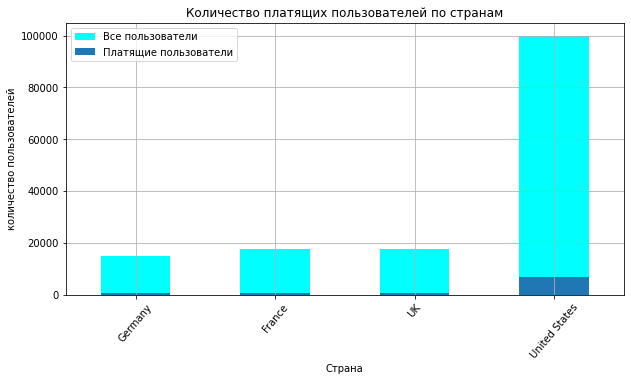

Taблица по общему количеству пользователей и платящих пользователей по признаку region


,region,all_users_qty,payer_users_qty,payers_from_total_users_per_dim_%,payers_from_total_payers_%
0,United States,100002,6902,6.901862,77.716473
1,UK,17575,700,3.982930,7.881995
2,France,17450,663,3.799427,7.465376
3,Germany,14981,616,4.111875,6.936156


In [23]:
profiles_data('region')


 Пользователи используют следующие устройства: 
 ['Mac' 'iPhone' 'PC' 'Android']


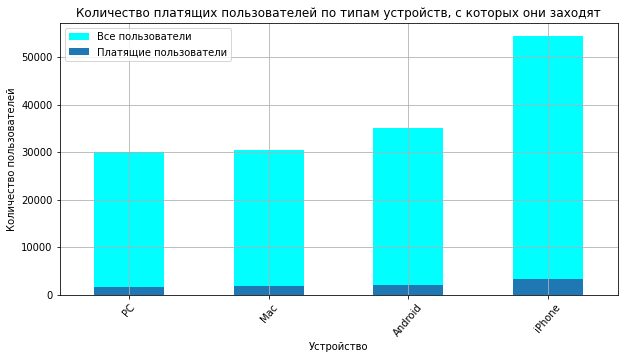

Taблица по общему количеству пользователей и платящих пользователей по признаку device


,device,all_users_qty,payer_users_qty,payers_from_total_users_per_dim_%,payers_from_total_payers_%
0,iPhone,54479,3382,6.207897,38.081297
1,Android,35032,2050,5.851793,23.082986
2,Mac,30042,1912,6.364423,21.529107
3,PC,30455,1537,5.046790,17.306610


In [24]:
profiles_data('device')


 Каналы привлечения пользователей: 
 ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


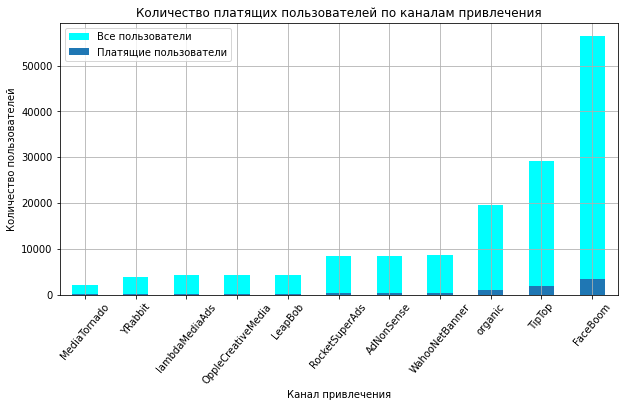

Taблица по общему количеству пользователей и платящих пользователей по признаку channel


,channel,all_users_qty,payer_users_qty,payers_from_total_users_per_dim_%,payers_from_total_payers_%
0,FaceBoom,29144,3557,12.204914,40.051796
1,TipTop,19561,1878,9.600736,21.146267
2,organic,56439,1160,2.055316,13.061592
3,WahooNetBanner,8553,453,5.296387,5.100777
4,AdNonSense,3880,440,11.340206,4.954397
5,RocketSuperAds,4448,352,7.913669,3.963518
6,LeapBob,8553,262,3.063253,2.950118
7,OppleCreativeMedia,8605,233,2.707728,2.623578
8,lambdaMediaAds,2149,225,10.469986,2.533498
9,YRabbit,4312,165,3.826531,1.857899


In [25]:
profiles_data('channel')

<b> Вывод </b>

* Минимальная дата привлечения пользователей: 2019-05-01 00:00:41 
*  Максимальная дата привлечения пользователей: 2019-10-27 23:59:04
*  Пользователи приходят из следующих стран:
 ['United States' 'France' 'Germany' 'UK']
* Пользователи используют следующие устройства: 
 ['Mac' 'iPhone' 'PC' 'Android']
* Каналы привлечения пользователей: 
 ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
* Больше всего платящих пользователей приходят из США, в других странах уровень практически одинаковый и ниже количества из США примерно в 7 раз
* Iphone является устройством , с которого чаще всего заходят платящие пользователи ~ 3500 пользователей, на втором, третьем и четвертом месте - Android, Mac, PC соответсвенно, у Mac и Android по ~ 2000 пользователей, у PC ~ 1500.
* Топ -3 канала привлечения - Faceboom, TipTop, organic. Меньше всего пользователей приходят с MediaTornado.

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Напишем функцию для вывода соответсвующей информации

In [26]:
def costs_info(dims):

    total_sum = round(costs['costs'].sum(),2)
    if dims == 'channel':
        print(2*'\n', f'Общая сумма затрат : {total_sum }',2*'\n')
    costs['dt_month'] = costs['dt'].dt.month
    costs['dt_date'] = costs['dt'].astype('datetime64[W]').dt.date
    
    months = ['null_month','january',
              'february', 'march', 'april', 'may', 'june', 
              'july', 'august', 'september','october', 
              'november', 'december']
    for month in costs['dt_month'].unique():
        costs.loc[costs['dt_month'] == month,'dt_month' ] = months[month]
    
    costs_grouped = (
        costs.groupby(dims).agg({'costs':'sum'})
        .sort_values(by  = 'costs', ascending = False).reset_index()
        
    )
    costs_grouped['cost_from_total_%'] = costs_grouped['costs'].div(total_sum)*100
    if dims == 'channel':
        xlab = 'Источник'
        tit = 'Затраты по источникам'
        
        profiles = metric('profiles',dimensions)
        total_users_per_dim = (
            profiles.groupby(dims).agg({'user_id':'nunique'})
            .reset_index()
            .rename(columns = {'user_id':'user_qty'})
        )
        costs_grouped = (
            costs_grouped.merge(total_users_per_dim, on = dims,how = 'left').
            reset_index(drop = True)
        )

        costs_grouped['cost_per_user'] =  costs_grouped['costs']/ costs_grouped['user_qty']
        
    elif dims == 'dt_month':
        xlab = 'Месяц 2019 года'
        tit = 'Затраты по времени (месяцам)'
        
    elif dims == 'dt_date':
        xlab = 'Даты'
        tit = 'Затраты по времени (по датам(неделям))'
        costs_grouped=costs_grouped.sort_values(by = 'dt_date').reset_index(drop = True)
        
        
    costs_grouped.plot(
        kind = 'bar', color = 'magenta',
        x = dims, y = 'costs',
        xlabel = xlab, ylabel = 'Затраты',
        title = tit, grid = True,figsize = (10,5), rot =50
    )
    plt.show()
    
    if dims == 'channel':
        xlab = 'Источник'
        tit = 'Затраты на одного человека по источникам'
        (
            costs_grouped.sort_values(by = 'cost_per_user',ascending = False)
            .plot(
                kind = 'bar', color = 'magenta',
                x = 'channel', y = 'cost_per_user',
                xlabel = xlab, ylabel = 'Затраты',
                title = tit, grid = True,figsize = (10,5), rot =50
            )
        )
    
        
    
    display(costs_grouped)




 Общая сумма затрат : 105497.3 




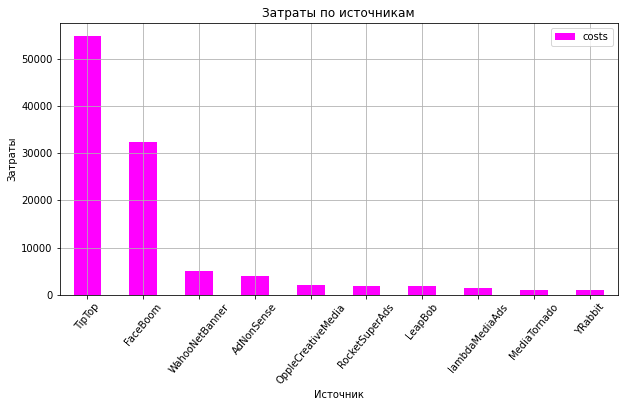

,channel,costs,cost_from_total_%,user_qty,cost_per_user
0,TipTop,54751.30,51.898295,19561,2.799003
1,FaceBoom,32445.60,30.754910,29144,1.113286
2,WahooNetBanner,5151.00,4.882589,8553,0.602245
3,AdNonSense,3911.25,3.707441,3880,1.008054
4,OppleCreativeMedia,2151.25,2.039152,8605,0.250000
5,RocketSuperAds,1833.00,1.737485,4448,0.412095
6,LeapBob,1797.60,1.703930,8553,0.210172
7,lambdaMediaAds,1557.60,1.476436,2149,0.724802
8,MediaTornado,954.48,0.904744,4364,0.218717
9,YRabbit,944.22,0.895018,4312,0.218975


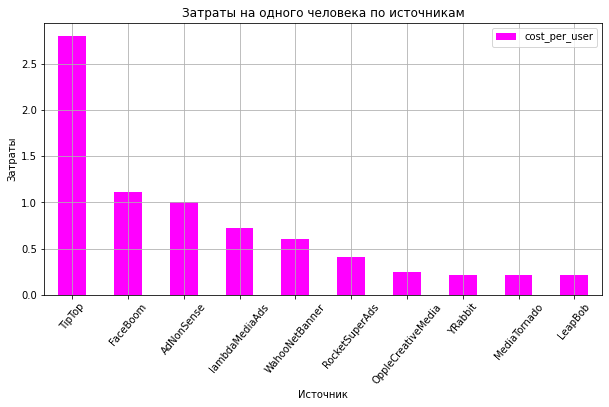

In [27]:
costs_info('channel')

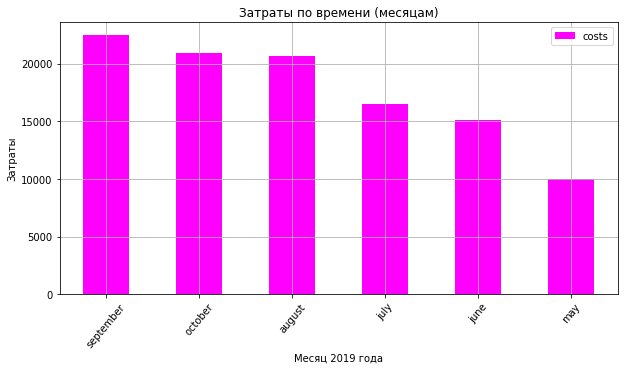

,dt_month,costs,cost_from_total_%
0,september,22441.340,21.271957
1,october,20882.415,19.794265
2,august,20657.870,19.581421
3,july,16447.060,15.590029
4,june,15090.045,14.303726
5,may,9978.570,9.458602


In [28]:
costs_info('dt_month')

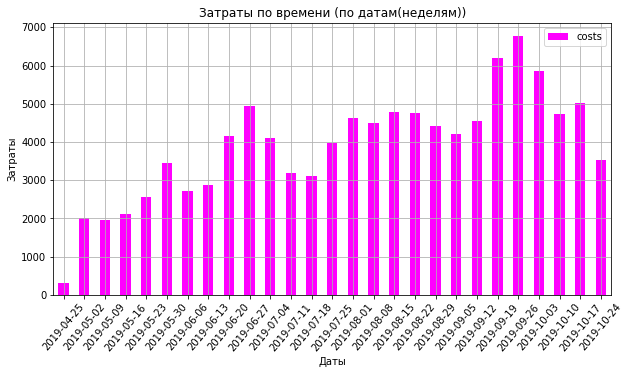

,dt_date,costs,cost_from_total_%
0,2019-04-25,304.820,0.288936
1,2019-05-02,2015.130,1.910125
2,2019-05-09,1956.045,1.854119
3,2019-05-16,2122.735,2.012123
4,2019-05-23,2574.860,2.440688
5,2019-05-30,3441.130,3.261818
6,2019-06-06,2713.210,2.571829
7,2019-06-13,2880.690,2.730582
8,2019-06-20,4168.225,3.951025
9,2019-06-27,4933.445,4.676371


In [29]:
costs_info('dt_date')

<b>Вывод: </b>

* Общая сумма затрат : 105497.3 
* Топ 3 канала привлечения по затратам - TipTop, FaceBoom, WahooNetBanner - 51%, 30%, 5% от общих затрат соответственно
* Данные по затаратам на каждый источник/по времени были расчитаны и приведены в таблице
* Затраты на одного пользователя по источникам были расчитаны и приведены в таблице
* Канал FaceBoom по затратам находится на втором месте, а уровень затрат на пользователя равен <b>1.1</b>, при этом FaceBoom дает <b>40 %</b> платящих пользователей от общего количества платящих пользователей.
* Канал TipTop	 по затратам находится на первом месте, а уровень затрат  на пользователя равен <b>2.7</b>, при этом TipTop дает <b>21 %</b> платящих пользователей от общего количества платящих пользователей.

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Перед расчетом окупаемости, выясним необходимо ли учитывать "органических" пользователей, так как мы рассчитываем окупаемость рекламы, то есть оцениваем возвращаемость вложенных денег, то понимаем, что инвестиций в развитие органических пользоватлей мы не делали, если мы оставим органических пользователей, то общая картина может измениться и мы рискуем принять решение на нерелевантных данных, соответственно считаю, что данных пользователей необходимо исключить из анализа.

Были внесены корректировки в исходную функцию.

In [30]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Общая окупаемость рекламы

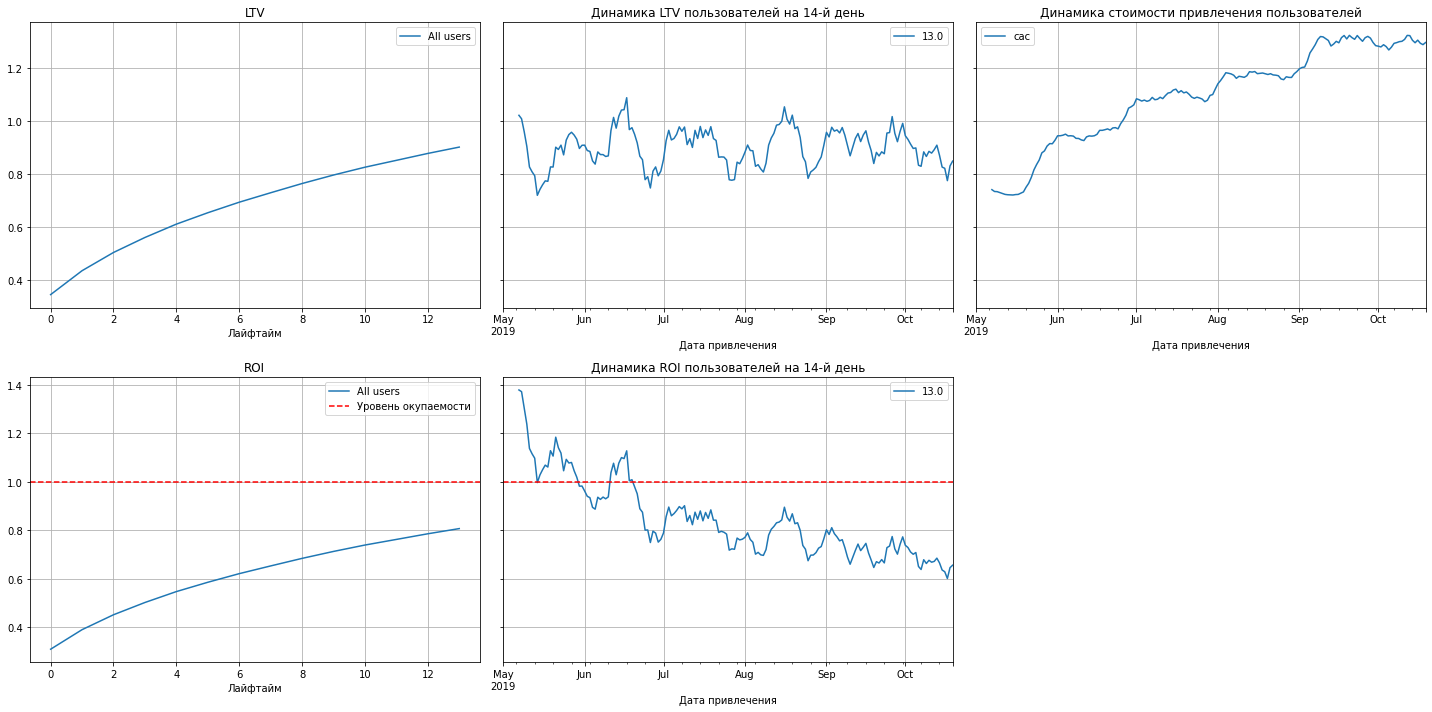

In [31]:
plot_metric('ltv_roi',dimensions =[])

<b> Вывод </b>

* Затраты на рекламу в целом не окупаются за 14 дней, ROI равен 80%
* Значение LTV в 14-ый день не постоянно, есть падения и взлеты, уровень держится в коридоре от 0,7 до 1,1
* CAC постепенно растет , при этом ROI снижается. Мы кладываем много в рекламу, но это не окупается.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

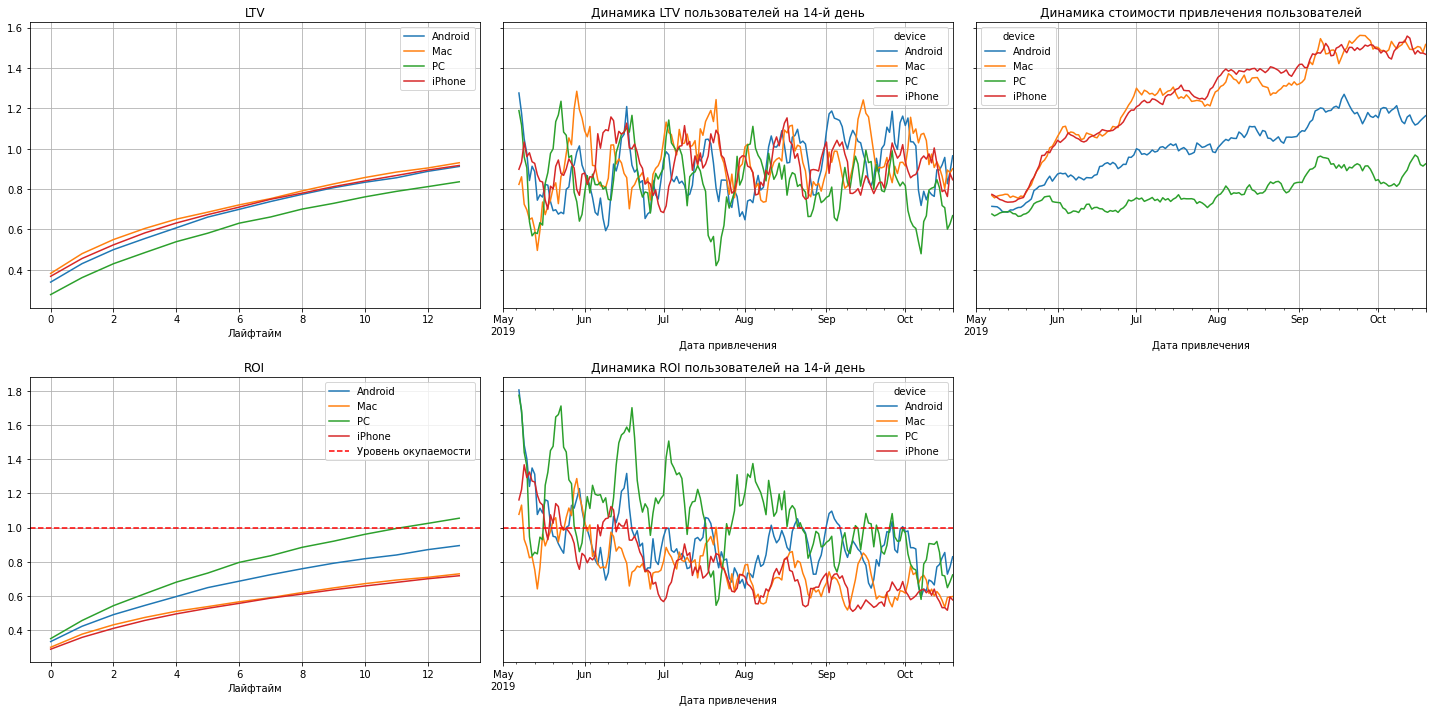

In [32]:
plot_metric('ltv_roi',dimensions =['device'])

<b> Вывод </b>
* Реклама окупилась только для пользователей PC.
* Стоимость привлечения  растет в течении всего рассматриваемого периода для пользователей всех устройств. 
* Стоимость привлечения самая низкая для пользователй PC.

### Проанализируйте окупаемость рекламы с разбивкой по странам

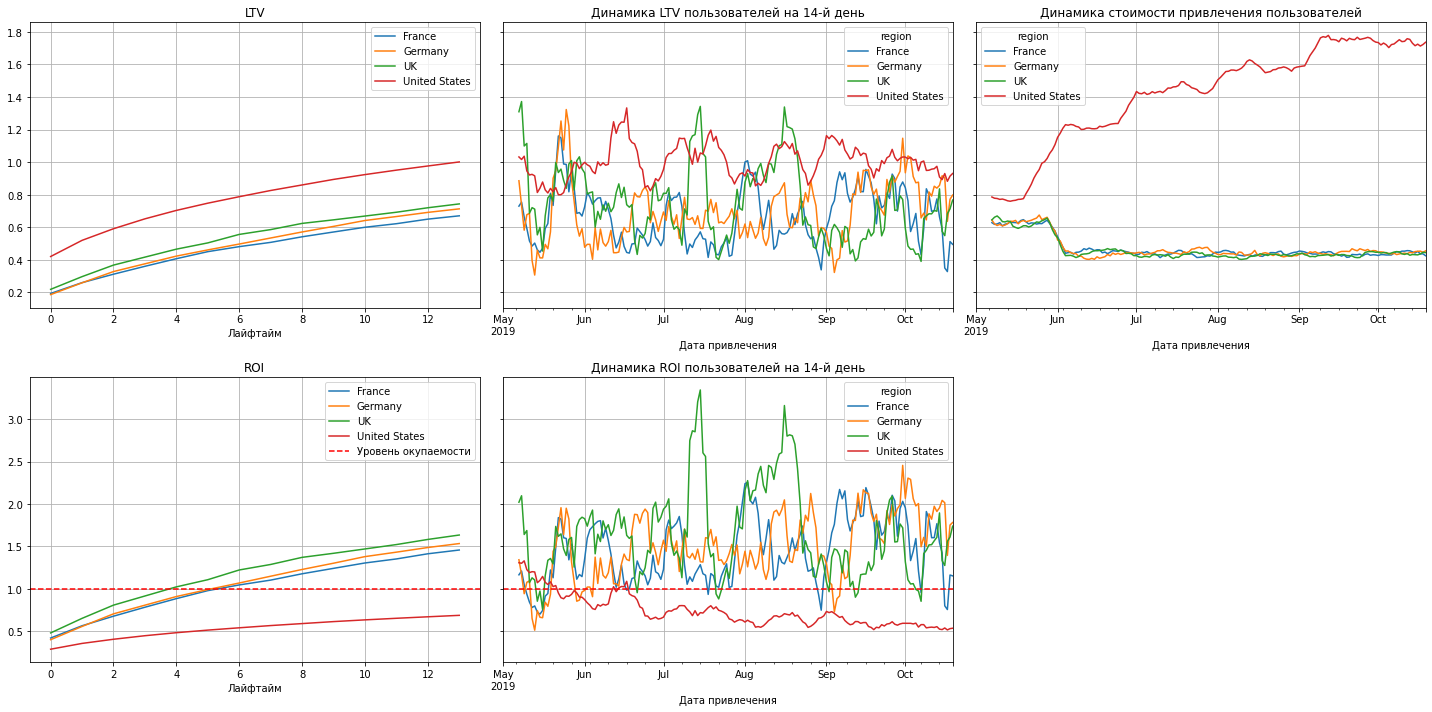

In [33]:
plot_metric('ltv_roi',dimensions =['region'])

<b> Вывод </b>

* Реклама для пользователей из США не окупается - ROI ~ 70%
* Стоимость привлечения для пользователей из США растет в течении всего рассматриваемого периода. По другим странам стоимость привлечения практически одинакова, и для июньских пользователй снижается по сравнению с майскими и держится на одном уровне.


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

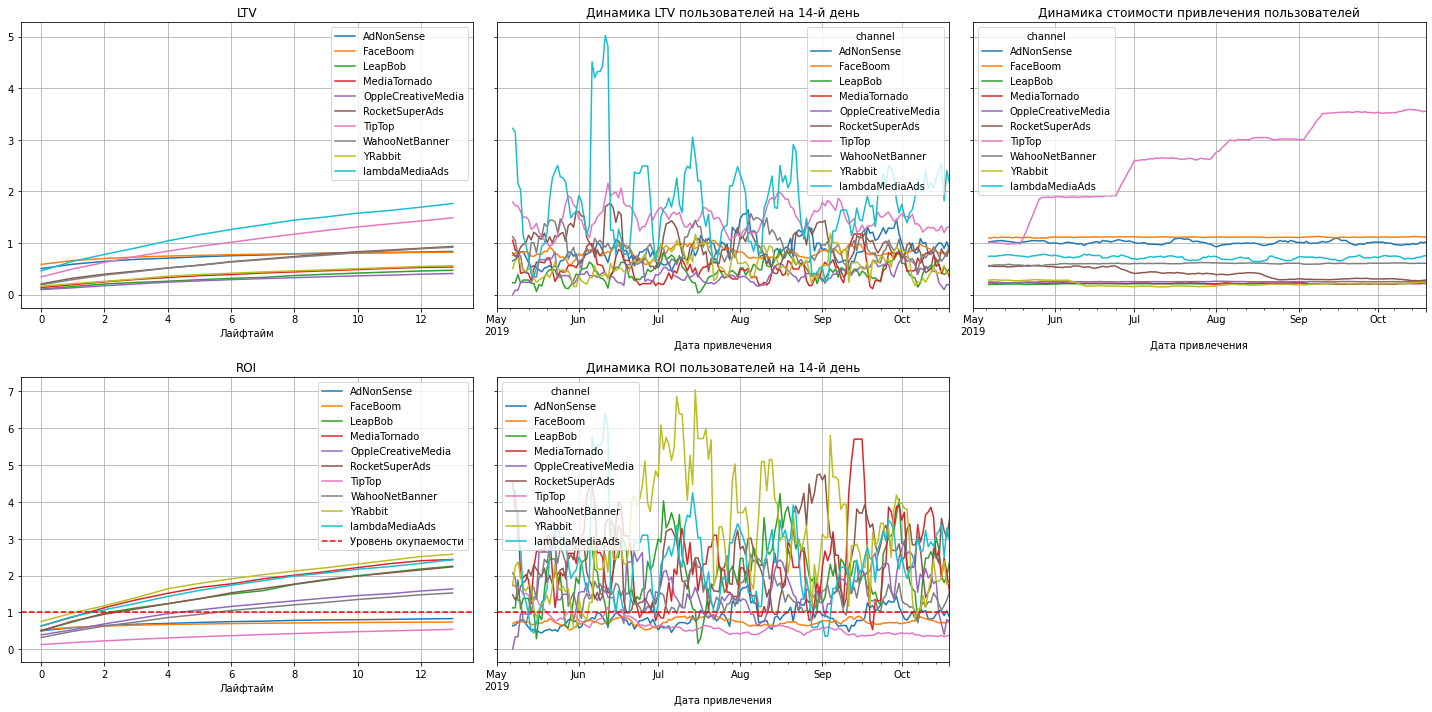

In [34]:
plot_metric('ltv_roi',dimensions =['channel'])

<b> Вывод </b>
* Реклама не окупается по трем каналам : Tip Top, Face Boom, AdNonSence
* Стоимость привлечения по каналу Tip Top постоянно растет, по другим каналам стоимость привлечения более менее стабильна.


###  Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

#### Конверсия и удержание с разбивкой по устройствам

 Конверсия с разбивкой по устройствам

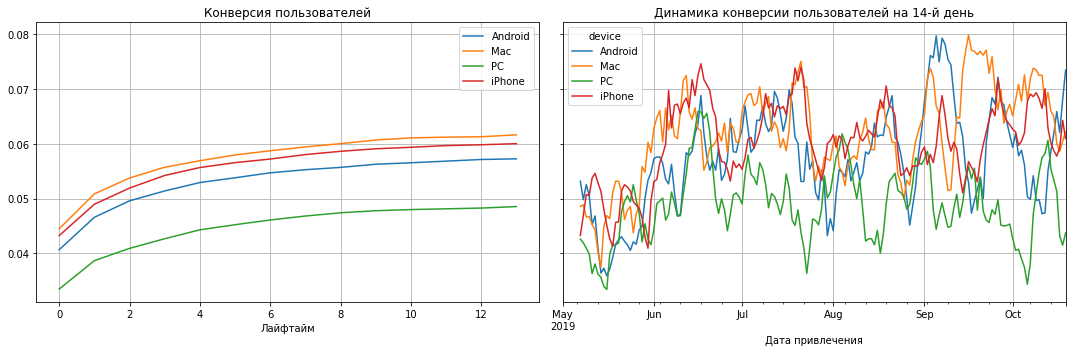

In [35]:
plot_metric('conversion',dimensions =['device'])

Удержание с разбивкой по  устройствам

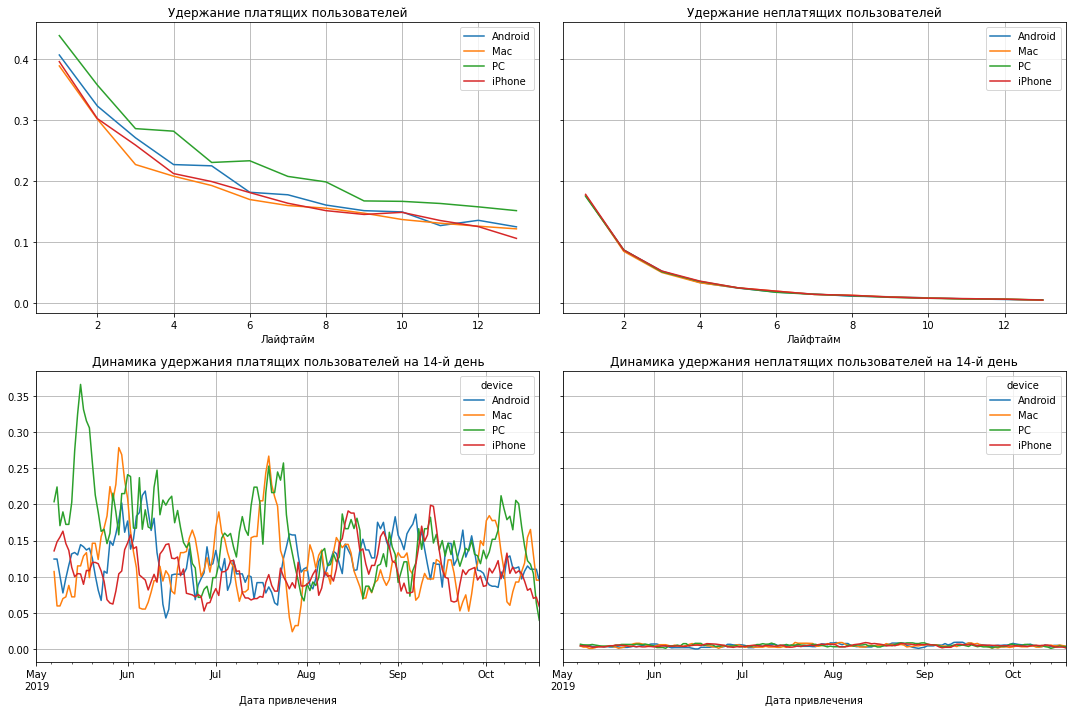

In [36]:
plot_metric('retention',dimensions =['device'])

#### Конверсия и удержание с разбивкой по странам

Конверсия  с разбивкой по рекламным по странам

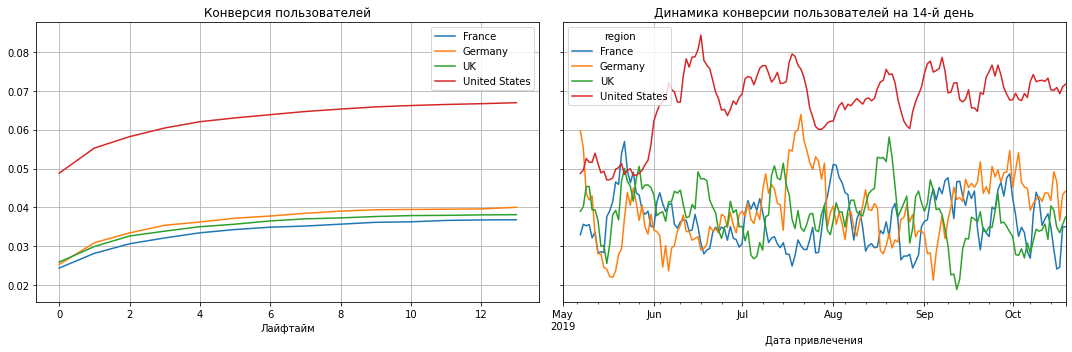

In [37]:
plot_metric('conversion',dimensions =['region'])

Удержание с разбивкой по странам

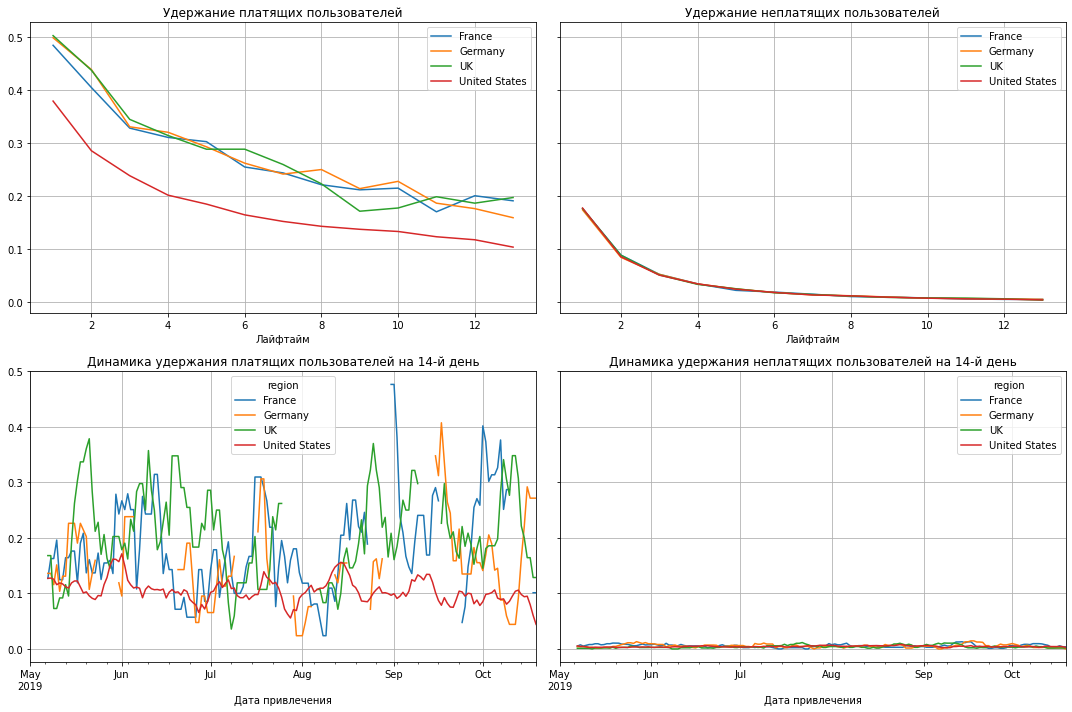

In [38]:
plot_metric('retention',dimensions =['region'])

#### Конверсия и удержание с разбивкой по рекламным каналам

Конверсия  с разбивкой по рекламным каналам

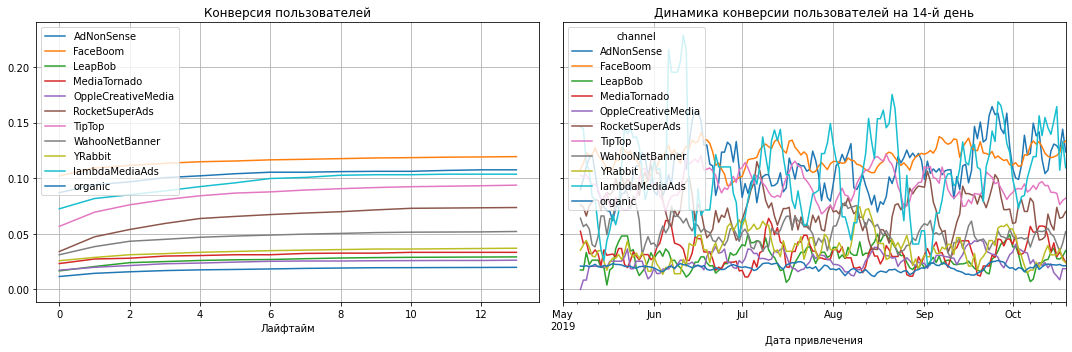

In [39]:
plot_metric('conversion',dimensions =['channel'])

Удержание с разбивкой по рекламным каналам

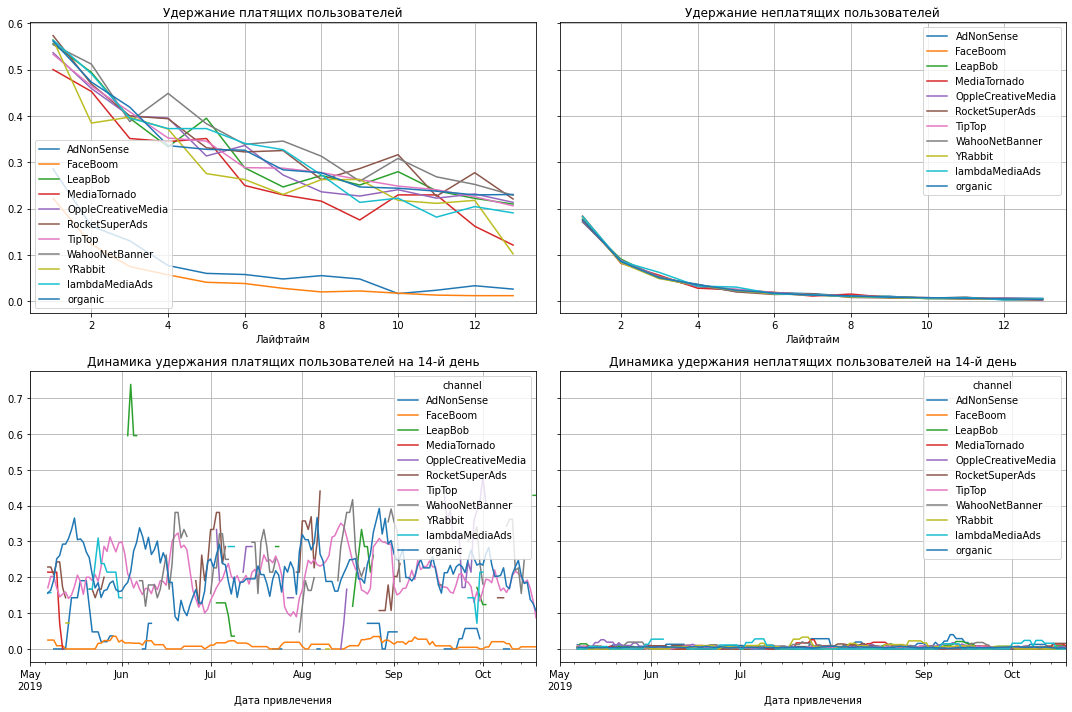

In [40]:
plot_metric('retention',dimensions =['channel'])

#### Вывод

* В разбивке по каналам: хуже всех удерживаются пользователи по каналам Adnonsense и FaceBoom, при этом они являются и лидерами по конверсии
* Пользователи из США хуже всех удерживаются , но по конверсии они являются лидерами
* По устройствам все примерно одинаково

Ответына вопросы:

* Окупается ли реклама, направленная на привлечение пользователей в целом?
 * Затраты на рекламу не окупаются в целом за 14 дней.
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
 * Устройства: окупается только реклама на PC, по остальным реклама не окупается
 * Страны: реклама для пользователей из США не окупается
 * Каналы: Tip Top, Face Boom, AdNonSence не окупаются.
* Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
 * Больше всего средтсв тратится на канале TipTop, но эти затраты не окупаются, необходимо больше информации, что за пользователи приходят с этого канала.
 * Face Boom, AdNonSence имеют низкое удержание и LTV, но высокую конверсию. Это влияет негативно на окупаемость
 * В США высока конверсия, но низкое удержание и окупаемость.

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
 * Крупные неоправданные инвестиции в TipTop и FaceBoom
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.
 * Перераспределить рекламный бюджет, так как два самых крупных канала являются неэффективными). Неплохие результаты демонстрирует канал RocketSuperAds - хорошее удержание и конвертация пользователей.
 * Проанализировать адиторию в США - высокая конверсия, самый большой приток клиентов, но не окупается и плохо удреживается.
 * Оценить причины низкого количества платящих пользователй в Европе.
 